## Logistic Regression with multiple variables

In [48]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# Show different between "true" value and "predicted" value
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
#len(digits['images'])
#digits['images'][0]     # 8x8 matrix
#digits['images'][0].shape
digits['images'][1796]    # last image

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

4

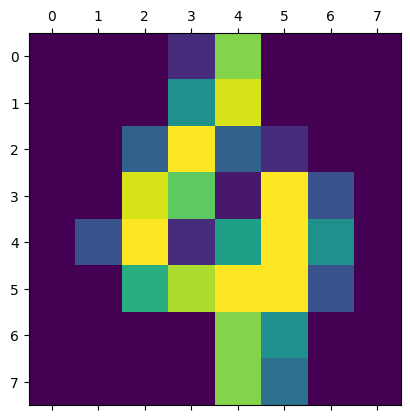

In [20]:
# plt.matshow(digits['images'][0]) # number 0
# digits['target'][0] 

plt.matshow(digits['images'][100]) # number 4
digits['target'][100] 
# classification

In [25]:
digits['data'][0], digits['target'][0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [26]:
X = digits['data']
y = digits['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
len(X_train) / len (X)

0.7996661101836394

In [36]:
model = LogisticRegression(max_iter=10000);
# train the model with "training set"
model.fit(X_train, y_train);

In [37]:
model.score(X_test, y_test)

0.9638888888888889

In [42]:
X_test[1], y_test[1]

(array([ 0.,  0.,  6., 14., 13.,  1.,  0.,  0.,  0.,  3., 16., 10.,  5.,
        11.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  0.,  0.,  0.,  6.,
        12.,  0.,  0., 12.,  3.,  0.,  0.,  7., 12.,  0.,  0., 13.,  3.,
         0.,  0.,  3., 11.,  0.,  5., 12.,  0.,  0.,  0.,  0., 13.,  4.,
        15.,  4.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.]),
 0)

In [44]:
model.predict([X_test[1]])  #=> True

array([0])

In [45]:
#predict probability
model.predict_proba([X_test[1]])

array([[9.99997934e-01, 3.56878389e-17, 2.76805135e-13, 1.13700419e-11,
        1.80545630e-07, 1.62083523e-06, 5.38454674e-11, 2.41955453e-07,
        1.96461165e-08, 2.47228364e-09]])

In [46]:
confusion_matrix(y_test, model.predict(X_test))

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 28,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1, 35,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 40]], dtype=int64)

Text(101.83333333333334, 0.5, 'True value')

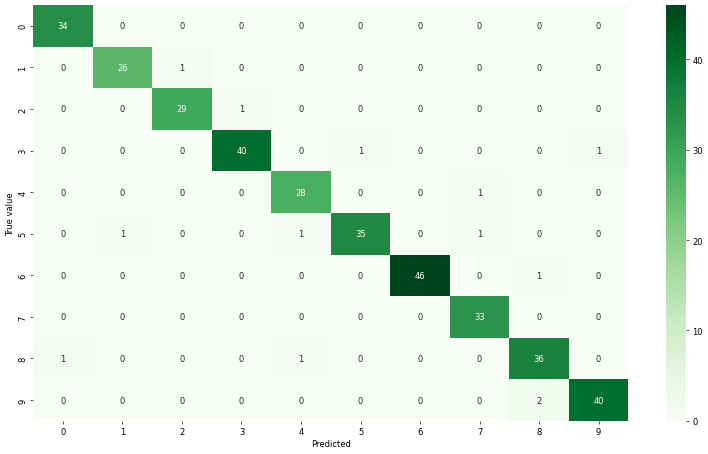

In [58]:
plt.figure(figsize=(16,9), dpi = 60)
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True value')